# Introduction to scikit learn

In [1]:
# lets listify the content that we are going to cover

what_were_covering=[
    '0. an end-to-end scikit learn workflow',
    '1. Getting the data ready',
    '2. choose the right estimator or algo for our problems',
    '3. fit the model/algo and use it to make prediction on our data', 
    '4. evaluating a model', 
    '5. improve a model',
    '6. save and load a trained model',
    '7. putting it all togeater!!'
]

In [2]:
what_were_covering

['0. an end-to-end scikit learn workflow',
 '1. Getting the data ready',
 '2. choose the right estimator or algo for our problems',
 '3. fit the model/algo and use it to make prediction on our data',
 '4. evaluating a model',
 '5. improve a model',
 '6. save and load a trained model',
 '7. putting it all togeater!!']

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
import nltk as nl

# 0. An end-to-end scikit learn workflow

In [2]:
heart_disease=pd.read_csv('Data/heart-disease.csv')
len(heart_disease)

303

In [2]:
# create x (features matrix)
x=heart_disease.drop('target',axis=1)

# create y 
y=heart_disease['target']

NameError: name 'heart_disease' is not defined

In [7]:
# 2. choose the right model and hpyerparameters

from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=100)

clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [10]:
# Fit the model for to the training data

from sklearn.model_selection import train_test_split

x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2)

In [12]:
clf.fit(x_train,y_train);

In [14]:
x_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
260,66,0,0,178,228,1,1,165,1,1.0,1,2,3
126,47,1,0,112,204,0,1,143,0,0.1,2,0,2
149,42,1,2,130,180,0,1,150,0,0.0,2,0,2
112,64,0,2,140,313,0,1,133,0,0.2,2,0,3
264,54,1,0,110,206,0,0,108,1,0.0,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3
15,50,0,2,120,219,0,1,158,0,1.6,1,0,2
267,49,1,2,118,149,0,0,126,0,0.8,2,3,2
174,60,1,0,130,206,0,0,132,1,2.4,1,2,3


In [15]:
# make a prediction

y_label=clf.predict(np.array([0,2,3,4]))

ValueError: Expected 2D array, got 1D array instead:
array=[0. 2. 3. 4.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [17]:
y_preds=clf.predict(x_test)
y_preds

array([1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0], dtype=int64)

In [18]:
y_test

89     1
97     1
186    0
103    1
226    0
      ..
121    1
22     1
272    0
195    0
234    0
Name: target, Length: 61, dtype: int64

In [19]:
clf.score(x_train, y_train)

1.0

In [20]:
clf.score(x_test , y_test)

0.9016393442622951

In [21]:
from sklearn.metrics import classification_report , confusion_matrix , accuracy_score

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.93      0.86      0.89        29
           1       0.88      0.94      0.91        32

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61



In [22]:
confusion_matrix(y_test , y_preds)

array([[25,  4],
       [ 2, 30]], dtype=int64)

In [23]:
accuracy_score(y_test , y_preds)

0.9016393442622951

In [24]:
# 5. improve a model 
# try differnt amount of n_estimators

np.random.seed(52)

for i in range(10,100,10):
    print(f'trying model with {i} estimator...')
    clf=RandomForestClassifier(n_estimators=i).fit(x_train , y_train)
    print(f'Model accuracy on test set: {clf.score(x_test , y_test)*100:.2f}%')
    print('')

trying model with 10 estimator...
Model accuracy on test set: 77.05%

trying model with 20 estimator...
Model accuracy on test set: 85.25%

trying model with 30 estimator...
Model accuracy on test set: 91.80%

trying model with 40 estimator...
Model accuracy on test set: 88.52%

trying model with 50 estimator...
Model accuracy on test set: 86.89%

trying model with 60 estimator...
Model accuracy on test set: 90.16%

trying model with 70 estimator...
Model accuracy on test set: 91.80%

trying model with 80 estimator...
Model accuracy on test set: 90.16%

trying model with 90 estimator...
Model accuracy on test set: 90.16%



In [25]:
# 6. save a model and load it

import pickle

pickle.dump(clf,open('random_forest_model1.pkl','wb'))

In [28]:
loaded_model=pickle.load(open('random_forest_model1.pkl','rb'))
loaded_model.score(x_test,y_test)

0.9016393442622951





# 1. Getting our data to be used with machine learing

In [29]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [30]:
# splitting the data 
x=heart_disease.drop('target',axis=1)

y=heart_disease['target']

In [31]:
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [32]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [33]:
# splitting the data into train and test

from sklearn.model_selection import train_test_split

x_train , x_test , y_train , y_test = train_test_split(x , y , test_size=0.2)

In [34]:
x_train.shape , x_test.shape , y_train.shape , y_test.shape

((242, 13), (61, 13), (242,), (61,))

In [35]:
len(heart_disease)

303

# 1.1 Make sure its all numerical



In [44]:
car_sales=pd.read_csv('Data/Scikit_learn_data/car-sales-extended.csv')
len(car_sales)

1000

In [45]:
car_sales['Doors'].value_counts()

4    856
5     79
3     65
Name: Doors, dtype: int64

In [46]:
len(car_sales)

1000

In [47]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [50]:
# split the data into training and  test

x=car_sales.drop('Price',axis=1)
y=car_sales['Price']

from sklearn.model_selection import train_test_split

x_train , x_test , y_train , y_test = train_test_split(x , y , test_size=0.2)

from sklearn.ensemble import RandomForestRegressor

model=RandomForestRegressor()
model.fit(x_train , y_train)
model.score(x_test , y_test)

ValueError: could not convert string to float: 'BMW'

In [51]:
x.head()

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3


In [74]:
# convert strings to integers

# Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                   one_hot,
                                   categorical_features)],
                                   remainder="passthrough")

transformed_X = transformer.fit_transform(x)
transformed_X                              

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [75]:
x.head()

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3


In [70]:
x.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
dtype: object

In [64]:
# another way to do is with pd.dummies

dummies=pd.get_dummies(car_sales[['Make','Colour','Doors']])
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,0,1,0,0,0,0,0,0,1
1,5,1,0,0,0,0,1,0,0,0
2,4,0,1,0,0,0,0,0,0,1
3,4,0,0,0,1,0,0,0,0,1
4,3,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
995,4,0,0,0,1,1,0,0,0,0
996,3,0,0,1,0,0,0,0,0,1
997,4,0,0,1,0,0,1,0,0,0
998,4,0,1,0,0,0,0,0,0,1


In [79]:
# lets refil the model

np.random.seed(0)

x_train , x_test , y_train , y_test = train_test_split(transformed_x, y , test_size=0.2)

model.fit(x_train, y_train);
model.score(x_test,y_test)*100

33.859210481423254

# what is there were missing data


In [87]:
car_sales_missing=pd.read_csv('Data/Scikit_learn_data/car-sales-extended-missing-data.csv')
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [89]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [90]:
# splitting the data

x=car_sales_missing.drop('Price',axis=1)

y=car_sales_missing['Price']

In [92]:
# convert the columns into integers

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

catagorical_features=['Make','Colour','Doors']
one_hot=OneHotEncoder()
transformer = ColumnTransformer([('one_hot',one_hot , catagorical_features)],remainder='passthrough')car

transform_x=transformer.fit_transform(x)

transformed_x

ValueError: Input contains NaN

In [93]:
car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [94]:
car_sales_missing['Doors'].value_counts()

4.0    811
5.0     75
3.0     64
Name: Doors, dtype: int64

In [95]:
car_sales_missing['Make'].fillna('missing',inplace=True)

car_sales_missing['Colour'].fillna('missing',inplace=True)

car_sales_missing['Odometer (KM)'].fillna(car_sales_missing['Odometer (KM)'].mean(),inplace=True)

car_sales_missing['Doors'].fillna(4,inplace=True)

In [98]:
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [97]:
car_sales_missing.dropna(inplace=True)

In [99]:
len(car_sales_missing)

950

In [102]:
# lets convert again the columns into integers

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

catagorical_features=['Make','Colour','Doors']
one_hot=OneHotEncoder()
transformer = ColumnTransformer([('one_hot',one_hot , catagorical_features)],remainder='passthrough')

transformed_x = transformer.fit_transform(car_sales_missing)

transformed_x

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        3.54310e+04, 1.53230e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        1.92714e+05, 1.99430e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        8.47140e+04, 2.83430e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        6.66040e+04, 3.15700e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.15883e+05, 4.00100e+03],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.48360e+05, 1.27320e+04]])

# option 2. filling data and transformaing categorical data with scikit learn

In [104]:
car_sales_missing=pd.read_csv('Data/Scikit_learn_data/car-sales-extended-missing-data.csv')
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [105]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [106]:
car_sales_missing.dropna(subset=['Price'],inplace=True)
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [107]:
# split the data 

x=car_sales_missing.drop('Price',axis=1)

y=car_sales_missing['Price']

# split the data into test and train

from sklearn.model_selection import train_test_split

x_train , x_test , y_train , y_test = train_test_split(x, y,test_size=0.2)

In [108]:
x.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
dtype: int64

In [111]:
# filling missing values with scikit learn

from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# fill categorical values with 'missing' and numerical values with 'mean'

cat_impute = SimpleImputer(strategy='constant', fill_value='missing')
door_impute= SimpleImputer(strategy='constant' , fill_value=4)
num_impute = SimpleImputer(strategy='mean')

#define columns

cat_features=['Make','Colour']
door_features = ['Doors']
num_features = ['Odometer (KM)']

# create an imputer (somthing that fills data)

imputer = ColumnTransformer([('cat_impute',cat_impute,cat_features),
                             ('door_impute', door_impute,door_features),
                             ('num_impute' , num_impute , num_features)])

filled_x_train = imputer.fit_transform(x_train)
filled_x_test = imputer.fit_transform(x_test)

filled_x_train

array([['Nissan', 'Blue', 4.0, 130565.26117318436],
       ['Toyota', 'Blue', 4.0, 215955.0],
       ['Honda', 'White', 4.0, 40134.0],
       ...,
       ['Toyota', 'Green', 4.0, 202862.0],
       ['Honda', 'missing', 4.0, 30615.0],
       ['Nissan', 'White', 4.0, 123121.0]], dtype=object)

In [112]:
car_sales_filled_train = pd.DataFrame(filled_x_train, columns=['Make','Colour','Doors','Odometer (KM)'])

car_sales_filled_test = pd.DataFrame(filled_x_test, columns=['Make','Colour','Doors','Odometer (KM)'])

car_sales_filled_train.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [113]:
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [117]:
# one hot encoder to convert strings to integers

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

catagorical_features=['Make','Colour','Doors']

one_hot=OneHotEncoder()

transformer=ColumnTransformer([('one_hot',one_hot),catagorical_features], remainder='passthrough')

transformed_x_train = transformer.fit_transform(car_sales_filled_train)
transformed_x_test = transformer.transform(car_sales_filled_test)

transformed_x_train.toarray()

ValueError: not enough values to unpack (expected 3, got 2)

In [118]:
# Now let's one hot encode the features with the same code as before 
categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", 
                                 one_hot, 
                                 categorical_features)],
                                 remainder="passthrough")

# Fill train and test values separately
transformed_X_train = transformer.fit_transform(car_sales_filled_train)
transformed_X_test = transformer.transform(car_sales_filled_test)

# Check transformed and filled X_train
transformed_X_train.toarray()

array([[0.00000000e+00, 0.00000000e+00, 1.00000000e+00, ...,
        1.00000000e+00, 0.00000000e+00, 1.30565261e+05],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.00000000e+00, 0.00000000e+00, 2.15955000e+05],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, ...,
        1.00000000e+00, 0.00000000e+00, 4.01340000e+04],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.00000000e+00, 0.00000000e+00, 2.02862000e+05],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, ...,
        1.00000000e+00, 0.00000000e+00, 3.06150000e+04],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00, ...,
        1.00000000e+00, 0.00000000e+00, 1.23121000e+05]])

In [125]:
from sklearn.ensemble import RandomForestRegressor
np.random.seed(0)
model=RandomForestRegressor()


model.fit(transformed_X_train,y_train)
model.score(transformed_X_test, y_test)

0.1974339780090152

In [121]:
np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()

# Make sure to use transformed (filled and one-hot encoded X data)
model.fit(transformed_X_train, y_train)
model.score(transformed_X_test, y_test)

0.17738683184997964

In [128]:
len(transformed_X_train.toarray())+len(transformed_X_test.toarray())

950

In [129]:
len(car_sales)

1000

# 2. choosing the right estimator/algo for our problem

In [3]:
from sklearn.datasets import load_boston
boston= load_boston()
boston;

In [4]:
boston_df=pd.DataFrame(boston['data'],columns=boston['feature_names'])
boston_df['target']=pd.Series(boston['target'])
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [135]:
len(boston_df)

506

In [138]:
# lets try the ridge regression model

from sklearn.linear_model import Ridge

np.random.seed(0)

x= boston_df.drop('target',axis=1)

y=boston_df['target']

from sklearn.model_selection import train_test_split

x_train , x_test , y_train , y_test = train_test_split(x, y,test_size=0.2)

model=Ridge()

model.fit(x_train , y_train)
model.score(x_test , y_test)

0.5796111714164927

In [148]:
# to improve the model lets try random forest regressor

from sklearn.ensemble import RandomForestRegressor

np.random.seed(0)

x=boston_df.drop('target',axis=1)
y=boston_df['target']


from sklearn.model_selection import train_test_split

x_train , x_test , y_train , y_test =train_test_split(x,y,test_size=0.2)

model=RandomForestRegressor(n_estimators=10)
model.fit(x_train , y_train)
model.score(x_test , y_test)*100

77.16338513443424

## 2.1  choosing an estimator for classification problem

In [149]:
heart_disease=pd.read_csv('Data/heart-disease.csv')
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [150]:
len(heart_disease)

303

In [152]:
# lets create the model

from sklearn.svm import LinearSVC

np.random.seed(0)

x=heart_disease.drop('target',axis=1)
y=heart_disease['target']

from sklearn.model_selection import train_test_split

x_train , x_test , y_train , y_test = train_test_split(x, y , test_size=0.2)

model=LinearSVC(max_iter=10000)
model.fit(x_train , y_train)
model.score(x_test , y_test)



C:\Users\kunal.sharma2395\Desktop\sample_project\env\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.4918032786885246

In [154]:
heart_disease['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

In [155]:
# import the random forest classifier

from sklearn.ensemble import RandomForestClassifier

np.random.seed(0)

x=heart_disease.drop('target',axis=1)
y=heart_disease['target']

from sklearn.model_selection import train_test_split

x_train , x_test , y_train , y_test = train_test_split(x,y, test_size=0.2)

model=RandomForestClassifier()

model.fit(x_train , y_train)
model.score(x_test , y_test)

0.8524590163934426

In [6]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## 3. Fit the model/algo on our data and use it to make predictions

3.1 Fit the model to the data

In [7]:
# import the random forest estimator 

from sklearn.ensemble import RandomForestClassifier

np.random.seed(0)

x=heart_disease.drop('target', axis=1)
y=heart_disease['target']

from sklearn.model_selection import train_test_split

x_train , x_test , y_train , y_test = train_test_split( x , y ,test_size=0.2)

model=RandomForestClassifier()
model.fit(x_train , y_train)
model.score(x_test , y_test)


0.8524590163934426

In [8]:
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [10]:
y.tail()

298    0
299    0
300    0
301    0
302    0
Name: target, dtype: int64

## 3.2 Make predictions using machine learning model

In [12]:
model.predict(np.array([1,2,3,4,5,6,7,8,9]))

ValueError: Expected 2D array, got 1D array instead:
array=[1. 2. 3. 4. 5. 6. 7. 8. 9.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [13]:
x_test.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
225,70,1,0,145,174,0,1,125,1,2.6,0,0,3
152,64,1,3,170,227,0,0,155,0,0.6,1,0,3
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
201,60,1,0,125,258,0,0,141,1,2.8,1,1,3
52,62,1,2,130,231,0,1,146,0,1.8,1,3,3


In [14]:
model.predict(x_test)

array([0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1], dtype=int64)

In [16]:
np.array(y_test)

array([0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1], dtype=int64)

In [17]:
y_preds =model.predict(x_test)
np.mean(y_test==y_preds)

0.8524590163934426

In [18]:
model.score(x_test , y_test)

0.8524590163934426

In [19]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test , y_preds)

0.8524590163934426

Make Predictions using predict_proba()

In [22]:
model.predict_proba(x_test[:5])

array([[0.79, 0.21],
       [0.49, 0.51],
       [0.44, 0.56],
       [1.  , 0.  ],
       [0.83, 0.17]])

In [23]:
model.predict(x_test[:5])

array([0, 1, 1, 0, 0], dtype=int64)

In [24]:
x_test[:5]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
225,70,1,0,145,174,0,1,125,1,2.6,0,0,3
152,64,1,3,170,227,0,0,155,0,0.6,1,0,3
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
201,60,1,0,125,258,0,0,141,1,2.8,1,1,3
52,62,1,2,130,231,0,1,146,0,1.8,1,3,3


In [29]:
heart_disease['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

In [34]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [36]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(0)

x=boston_df.drop('target' , axis=1)
y=boston_df['target']

from sklearn.model_selection import train_test_split

x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2)

model=RandomForestRegressor()
model.fit(x_train , y_train)

y_preds=model.predict(x_test)

In [37]:
y_preds[:10]

array([24.073, 26.809, 22.319, 11.124, 20.434, 20.539, 21.172, 19.846,
       20.74 , 18.803])

In [39]:
np.array(y_test[:10])

array([22.6, 50. , 23. ,  8.3, 21.2, 19.9, 20.6, 18.7, 16.1, 18.6])

In [43]:
# compare the two predictions

from sklearn.metrics import mean_absolute_error, mean_squared_error , r2_score
mean_squared_error(y_test , y_preds)

19.755890117647073

## 4. Evaluating a machine learnig model

1. estimator score method
2. the scoring parameter
3. problem specific metric function

### 4.1 Evaluating a model using a score method

In [45]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(0)

x=heart_disease.drop('target',axis=1)
y=heart_disease['target']

from sklearn.model_selection import train_test_split

x_train , x_test , y_train , y_test = train_test_split(x , y , test_size=0.2)

model=RandomForestClassifier()
model.fit(x_train , y_train);

In [47]:
model.score(x_train , y_train)

1.0

In [48]:
model.score(x_test , y_test)

0.8524590163934426

Lets do the same but for regression

In [52]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(0)

x=boston_df.drop('target' ,axis=1)
y=boston_df['target']

from sklearn.model_selection import train_test_split

x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2)

model=RandomForestRegressor(n_estimators=100)
model.fit(x_train , y_train);

In [53]:
model.score(x_test , y_test)

0.7573834111859951

### 4.2 Evaluating a model using a scoring parameter

In [55]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

x=heart_disease.drop('target',axis=1)
y=heart_disease['target']

from sklearn.model_selection import train_test_split

x_train , x_test , y_train , y_test = train_test_split(x ,y , test_size=0.2)

model=RandomForestClassifier(n_estimators=100)
model.fit(x_train , y_train);

In [56]:
model.score(x_test , y_test)

0.6557377049180327

In [58]:
cross_val_score(model,x,y,cv=5)

array([0.83606557, 0.8852459 , 0.7704918 , 0.78333333, 0.75      ])

In [59]:
cross_val_score(model,x,y,cv=10)

array([0.90322581, 0.80645161, 0.83870968, 0.9       , 0.83333333,
       0.76666667, 0.8       , 0.83333333, 0.73333333, 0.83333333])

In [61]:
np.random.seed(0)

model1= model.score(x_test , y_test)

model2= np.mean(cross_val_score(model , x , y , cv=5))

model1 , model2

(0.6557377049180327, 0.8248087431693989)

In [62]:
cross_val_score(model , x, y ,cv=5 , scoring=None)

array([0.83606557, 0.8852459 , 0.80327869, 0.81666667, 0.75      ])

### 4.2.1 classification model evaluation metrics

1. accuracy
2. ROC curve
3. confusion matrix
4. classification report

**Accuracy**

In [5]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

x=heart_disease.drop('target',axis=1)
y=heart_disease['target']

from sklearn.model_selection import train_test_split

x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2)

model=RandomForestClassifier()
model.fit(x_train, y_train)
cross_val_score(model ,x ,y ,cv=5)

array([0.83606557, 0.83606557, 0.81967213, 0.81666667, 0.78333333])

In [64]:
np.mean(cross_val_score(model , x , y , cv=5))

0.8150273224043716

In [69]:
print(f'Heart disease classifier cross validated accuracy: {np.mean(cross_val_score(model,x,y,cv=5) *100,.2f)}%')

SyntaxError: invalid syntax (<fstring>, line 1)

In [6]:
# create test data 
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test =train_test_split(x, y , test_size=0.2)

In [8]:
from sklearn.metrics import roc_curve

model.fit(x_train , y_train)

y_probs=model.predict_proba(x_test)

y_probs[:10] , len(y_probs)

(array([[0.14, 0.86],
        [0.35, 0.65],
        [0.24, 0.76],
        [0.35, 0.65],
        [0.76, 0.24],
        [0.94, 0.06],
        [0.71, 0.29],
        [0.35, 0.65],
        [0.96, 0.04],
        [0.06, 0.94]]),
 61)

In [9]:
y_probs_positive = y_probs[:,1]
y_probs_positive[:10]

array([0.86, 0.65, 0.76, 0.65, 0.24, 0.06, 0.29, 0.65, 0.04, 0.94])

In [11]:
# calculate fpt , tpr , threshold

fpr , tpr , threshold =roc_curve(y_test , y_probs_positive)

fpr

array([0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.04, 0.04, 0.08, 0.12, 0.12, 0.12, 0.2 , 0.24, 0.24, 0.6 , 0.6 ,
       0.72, 0.88, 0.92, 1.  ])

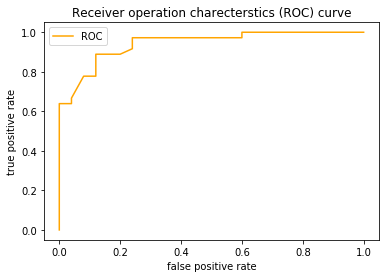

In [17]:
# creating a function to plot roc_curve

import matplotlib.pyplot as plt

def plot_roc_curve(fpr , tpr):
    plt.plot(fpr , tpr , color='orange', label='ROC')
    
    plt.xlabel('false positive rate')
    plt.ylabel('true positive rate')
    plt.title('Receiver operation charecterstics (ROC) curve')
    plt.legend()
    plt.show()
    
plot_roc_curve(fpr , tpr)

In [18]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test , y_probs_positive)

0.9427777777777778

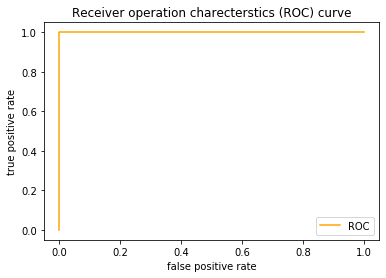

In [21]:
# for a perfect curve
fpr , tpr , thresholds=roc_curve(y_test , y_test)

plot_roc_curve(fpr , tpr)

In [22]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test , y_test)

1.0

### confusion matrix

In [23]:
from sklearn.metrics import confusion_matrix

y_preds=model.predict(x_test)

confusion_matrix(y_test , y_preds)

array([[22,  3],
       [ 4, 32]], dtype=int64)

In [24]:
pd.crosstab(y_test , y_preds , rownames=['actual labels'],colnames=['predicted labels'])

predicted labels,0,1
actual labels,,
0,22,3
1,4,32


In [25]:
len(x_test)

61

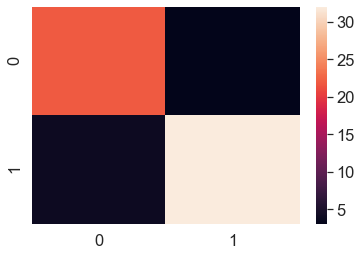

In [26]:
import seaborn as sns

sns.set(font_scale=1.5)

conf_mat = confusion_matrix(y_test , y_preds)

sns.heatmap(conf_mat)

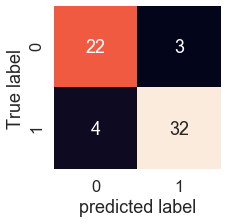

In [27]:
def plot_conf_mat(conf_mat):
    
    fig , ax=plt.subplots(figsize=(3,3))
    ax=sns.heatmap(conf_mat ,annot=True , cbar=False)
    plt.xlabel('predicted label')
    plt.ylabel('True label')
    
    
    
plot_conf_mat(conf_mat)

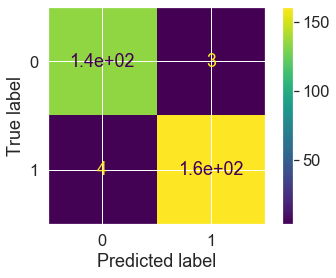

In [29]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(model , x, y)

### classification report

In [31]:
from sklearn.metrics import classification_report

print(classification_report(y_test , y_preds))

              precision    recall  f1-score   support

           0       0.85      0.88      0.86        25
           1       0.91      0.89      0.90        36

    accuracy                           0.89        61
   macro avg       0.88      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



In [33]:
disease_true=np.zeros(10000)
disease_true[0]=1

disease_preds=np.zeros(10000)

pd.DataFrame(classification_report(disease_true , disease_preds , output_dict=True))

C:\Users\kunal.sharma2395\Desktop\sample_project\env\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


### 4.2.2 Regression model evaluation metrices



1. root mean squared error
2. mean absolute error
3. mean `squared error`

In [36]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(0)

x=boston_df.drop('target',axis=1)
y=boston_df['target']

from sklearn.model_selection import train_test_split

x_train , x_test , y_train , y_test = train_test_split(x, y ,test_size=0.2)

model=RandomForestRegressor(n_estimators=100)
model.fit(x_train , y_train);

In [37]:
model.score(x_test , y_test)

0.7573834111859951

In [39]:
from sklearn.metrics import r2_score

y_preds=model.predict(x_test)

r2_score(y_test, y_preds)

0.7573834111859951

***Mean absolute error***

In [40]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test , y_preds)

2.6558627450980405

In [42]:
df=pd.DataFrame({'actual values': y_test,'predicted values':y_preds})


df['difference']=df['actual values']-df['predicted values']

df

,actual values,predicted values,difference
329,22.6,24.073,-1.473
371,50.0,26.809,23.191
219,23.0,22.319,0.681
403,8.3,11.124,-2.824
78,21.2,20.434,0.766
...,...,...,...
56,24.7,23.449,1.251
455,14.1,14.861,-0.761
60,18.7,18.792,-0.092
213,28.1,24.073,4.027


***Mean squared error***

In [44]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test , y_preds)

19.755890117647073

### 4.2.3 Finally using the scoring parameter

In [49]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(0)

x=heart_disease.drop('target' , axis=1)
y=heart_disease['target']

from sklearn.model_selection import train_test_split

x_train , x_test , y_train , y_test = train_test_split(x ,y ,test_size=0.2)

model=RandomForestClassifier(n_estimators=100)
model.fit(x_test , y_test)
cross_val=cross_val_score(model ,x ,y ,cv=5,scoring=None)

In [50]:
print(f'the cross validated accuracy is: {np.mean(cross_val)*100:.2f}%')

the cross validated accuracy is: 81.82%


In [53]:
cross_val2=cross_val_score(model , x , y ,cv=5 , scoring='accuracy')

print(f'The cross validated accuracy is: {np.mean(cross_val2)*100:.2f}%')

The cross validated accuracy is: 81.81%


In [54]:
cross_val2=cross_val_score(model , x , y ,cv=5 , scoring='precision')

print(f'The cross validated accuracy is: {np.mean(cross_val2)*100:.2f}%')

The cross validated accuracy is: 82.90%


In [55]:
cross_val2=cross_val_score(model , x , y ,cv=5 , scoring='recall')

print(f'The cross validated accuracy is: {np.mean(cross_val2)*100:.2f}%')

The cross validated accuracy is: 84.24%


In [56]:
cross_val2=cross_val_score(model , x , y ,cv=5 , scoring='f1')

print(f'The cross validated accuracy is: {np.mean(cross_val2)*100:.2f}%')

The cross validated accuracy is: 84.18%


how about our regression model?

In [57]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

x=boston_df.drop('target' ,axis=1)
y=boston_df['target']

from sklearn.model_selection import train_test_split

x_train , x_test , y_train , y_test = train_test_split(x , y , test_size=0.2)

model=RandomForestRegressor(n_estimators=100)
model.fit(x_train , y_train);

In [58]:
cv1=cross_val_score(model , x , y ,cv=5 ,scoring='r2')
print(f'The cross validated accuracy is: {np.mean(cv1)*100:.2f}%')

The cross validated accuracy is: 61.55%


In [59]:
cv1=cross_val_score(model , x , y ,cv=5 ,scoring='neg_mean_absolute_error')
print(f'The cross validated accuracy is: {np.mean(cv1)*100:.2f}%')

The cross validated accuracy is: -299.33%


In [60]:
cv1=cross_val_score(model , x , y ,cv=5 ,scoring='neg_mean_squared_error')
print(f'The cross validated accuracy is: {np.mean(cv1)*100:.2f}%')

The cross validated accuracy is: -2135.25%


In [10]:
### 4.3 Using different evaluation metrics in skikit learn

from sklearn.metrics import accuracy_score , precision_score , recall_score , f1_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(0)

x=heart_disease.drop('target',axis=1)
y=heart_disease['target']

from sklearn.model_selection import train_test_split

x_train , x_test , y_train , y_test =train_test_split(x , y , test_size=0.2)

model=RandomForestClassifier(n_estimators=100)
model.fit(x_train , y_train)

y_preds=model.predict(x_test)

print('classifier metrics on test sets are:')
print(f'the accuracy score is: {accuracy_score(y_test , y_preds)*100:.2f}%')
print(f'the precision score is: {precision_score(y_test , y_preds)}')
print(f'the recall score is : {recall_score(y_test , y_preds)}')
print(f'the fi score is: {f1_score(y_test , y_preds)}')

classifier metrics on test sets are:
the accuracy score is: 85.25%
the precision score is: 0.8571428571428571
the recall score is : 0.8823529411764706
the fi score is: 0.8695652173913043


In [6]:
### 4.3 Using different evaluation metrics in skikit learn

from sklearn.metrics import r2_score , mean_absolute_error , mean_squared_error
from sklearn.ensemble import RandomForestRegressor
np.random.seed(0)

x=boston_df.drop('target' , axis=1)
y=boston_df['target']

from sklearn.model_selection import train_test_split

x_train , x_test , y_train , y_test =train_test_split(x , y , test_size=0.2)

model=RandomForestRegressor(n_estimators=100)
model.fit(x_train , y_train)

y_preds=model.predict(x_test)

print('classifier metrics on test sets are:')
print(f'the accuracy score is: {r2_score(y_test , y_preds)*100:.2f}%')
print(f'the precision score is: {mean_absolute_error(y_test , y_preds)}%')
print(f'the recall score is : {mean_squared_error(y_test , y_preds)}%')

classifier metrics on test sets are:
the accuracy score is: 75.74%
the precision score is: 2.6558627450980405%
the recall score is : 19.755890117647073%


### 5. Improve a model

In [66]:
from sklearn.ensemble import RandomForestClassifier

model=RandomForestClassifier(n_estimators=100)

model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

### 5.1 Tuning hyperparameters by hand


    `max_depth`
    `max_features`
    `min_samples_leaf`
    `min_samples_split`
    `n_estimators`

In [12]:
def evaluate_preds(y_true , y_preds):
    accuracy=accuracy_score(y_test , y_preds)
    precision=precision_score(y_true , y_preds)
    recall = recall_score (y_true , y_preds)
    f1 = f1_score (y_true , y_preds)
    
    met_dict={'accuracy':round(accuracy , 2),
              'precision':round(precision , 2),
              'recall' : round(recall , 2),
              'f1' : round(f1 , 2)
    }
    
    return met_dict

In [13]:
evaluate_preds(y_test , y_preds)

{'accuracy': 0.85, 'precision': 0.86, 'recall': 0.88, 'f1': 0.87}

### Now its time to shuffle the data and split into 3 parts

In [25]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(0)

heart_disease_shuffle=heart_disease.sample(frac = 1)

x=heart_disease_shuffle.drop('target' , axis=1)
y=heart_disease_shuffle['target']

from sklearn.model_selection import train_test_split

train_split = round(0.7 * len(heart_disease_shuffle))
valid_split = round(train_split + 0.15*len(heart_disease_shuffle))
x_train , y_train = x[:train_split] , y[:train_split]
x_valid , y_valid = x[train_split : valid_split] , y[train_split : valid_split]
x_test , y_test = x[valid_split:] , y[valid_split:]

model = RandomForestClassifier(n_estimators=100)
model.fit(x_train , y_train)

model.score(x_valid , y_valid)

0.8

In [27]:
np.random.seed(0)

model2= RandomForestClassifier(n_estimators=50)

model2.fit(x_train , y_train)

model2.score(x_test , y_test)

0.8913043478260869

### 5.2 hyperparameters tuning eith RandomizeserchCV

In [41]:
from sklearn.model_selection import RandomizedSearchCV

grid={'n_estimators': [10,100,200,500,1000,1200],
      'max_depth': [None , 5 , 10 , 20 , 30],
      'max_features' : ['auto' , 'sqrt'],
      'min_samples_split' : [2,4,6],
      'min_samples_leaf' : [1,2,4]
}

np.random.seed(0)


x=heart_disease.drop('target' , axis=1)
y=heart_disease['target']

from sklearn.model_selection import train_test_split

x_train , x_test , y_train , y_test = train_test_split( x , y, test_size=0.2)

model=RandomForestClassifier(n_jobs=1)

rs_model=RandomizedSearchCV(estimator=model , param_distributions=grid , n_iter=10 , cv=5 , verbose=2 )

rs_model.fit(X_train , y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=200, min_samples_split=4, min_samples_leaf=1, max_features=auto, max_depth=None 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=1, max_features=auto, max_depth=None, total=   0.7s
[CV] n_estimators=200, min_samples_split=4, min_samples_leaf=1, max_features=auto, max_depth=None 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=1, max_features=auto, max_depth=None, total=   0.7s
[CV] n_estimators=200, min_samples_split=4, min_samples_leaf=1, max_features=auto, max_depth=None 
[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=1, max_features=auto, max_depth=None, total=   0.6s
[CV] n_estimators=200, min_samples_split=4, min_samples_leaf=1, max_features=auto, max_depth=None 
[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=1, max_features=auto, max_depth=None, total=   0.6s
[CV] n_estimators=200, min_samples_split=4, min_samples_leaf=1, max_features=auto, max_depth=None 
[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=1, max_features=auto, max_depth=None, total=   0.6s
[CV] n_estimators=100, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=10 
[CV]  n_estimators=100, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=10, total=   0.3s
[CV] n_estimators=100, min_samples_spl

[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=5, total=   3.6s
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=5 
[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=5, total=   3.7s
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=5 
[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=5, total=   3.8s
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=5 
[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=5, total=   3.9s
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=5 
[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=5, total=   3.6s
[CV] n_estimators=10, min_samples_split=2, min_sampl

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.4min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

### 5.3 Hyperparametes tuning with gridsearchCV

In [42]:
grid2={'n_estimators': [100,200,500],
       'max_depth' : [None],
       'max_features' : ['auto' , 'sqrt'],
       'min_samples_split' : [6],
       'min_samples_leaf' : [1,2]
       
}

In [44]:
from sklearn.model_selection import train_test_split , GridSearchCV

np.random.seed(0)

heart_disease_shuffle=heart_disease.sample(frac=1)

x=heart_disease_shuffle.drop('target' , axis=1)
y=heart_disease_shuffle['target']

x_train , x_test , y_train , y_test = train_test_split( x, y , test_size=0.2)

model=RandomForestClassifier(n_jobs=1)


gs_model=GridSearchCV(estimator=model , param_grid=grid2 , cv=5 , verbose=2)

gs_model.fit(x_train , y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.6s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.4s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.5s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.4s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.4s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200, total=   0.8s
[CV] max_depth=None, max_features=

[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500, total=   1.7s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500, total=   1.8s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500, total=   1.6s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500, total=   2.1s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500, total=   2.0s
[CV] max_depth=None, max_features=

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:  1.0min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=1,
                                              oob_score=False,
                                              random_s

In [45]:
gs_model.best_params_

{'max_depth': None,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 6,
 'n_estimators': 200}

In [49]:
gs_y_preds = gs_model.predict(x_test)

gs_metrics = evaluate_preds(y_test ,gs_y_preds)
gs_metrics

{'accuracy': 0.85, 'precision': 0.87, 'recall': 0.89, 'f1': 0.88}

## 6. Saving and loading trained machine learning model

**pickle**

In [50]:
import pickle

pickle.dump(gs_model, open('gs random forest model.pkl','wb'))

In [51]:
## loaded pickle model

loaded_pickle_model=pickle.load(open('gs random forest model.pkl', 'rb'))

In [54]:
pickle_y_preds = loaded_pickle_model.predict(x_test)

evaluate_preds(y_test ,pickle_y_preds)

{'accuracy': 0.85, 'precision': 0.87, 'recall': 0.89, 'f1': 0.88}

Joblib

In [55]:
from joblib import dump , load

dump(gs_model , filename='gs random forest model.joblib')

['gs random forest model.joblib']

In [56]:
## import loaded model
loaded_pickle_model2= load(filename='gs random forest model.joblib')

In [57]:
gs_y_preds1=loaded_pickle_model2.predict(x_test)

In [58]:
evaluate_preds(y_test , gs_y_preds1)

{'accuracy': 0.85, 'precision': 0.87, 'recall': 0.89, 'f1': 0.88}

## Revision 

In [59]:
car_sales=pd.read_csv('Data/Scikit_learn_data/car-sales-extended.csv')

In [67]:
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [68]:
x=car_sales.drop('Price',axis=1)
y=car_sales['Price']

In [66]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [73]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

catagorical_features=['Make' , 'Colour' , 'Doors']

one_hot=OneHotEncoder()

transformer=ColumnTransformer([('one_hot', one_hot ,catagorical_features)],remainder='passthrough')

transformed_x=transformer.fit_transform(x)

transformed_x

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [76]:
transformed_x_df=pd.DataFrame(transformed_x)

## Pracice of what is there are missng values

In [89]:
car_sales_missing=pd.read_csv('Data/Scikit_learn_data/car-sales-extended-missing-data.csv')
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [90]:
len(car_sales_missing)

1000

In [80]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [91]:
x=car_sales_missing.drop('Price',axis=1)
y=car_sales_missing['Price']

In [82]:
car_sales_missing.dtypes

Make              object
Colour            object
Odometer (KM)    float64
Doors            float64
Price            float64
dtype: object

In [92]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

np.random.seed(0)

catagorical_features=['Make' ,'Colour' , 'Doors']

one_hot=OneHotEncoder()

transformer=ColumnTransformer([('one_hot',one_hot,catagorical_features)],remainder='passthrough')

transformed_x=transformer.fit_transform(x)

transformed_x

ValueError: Input contains NaN

In [87]:
car_sales_missing['Make'].fillna('missing', inplace=True)

car_sales_missing['Colour'].fillna('missing', inplace=True)

car_sales_missing['Odometer (KM)'].fillna(car_sales_missing['Odometer (KM)'].mean(),inplace=True)

car_sales_missing['Doors'].fillna('4', inplace=True)

In [94]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [106]:
from sklearn.model_selection import train_test_split

x_train , x_test , y_train , y_test =train_test_split(x,y , test_size=0.2)

In [107]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

np.random.seed(0)

cat_impute = SimpleImputer(strategy='constant' , fill_value='missing')
door_impute = SimpleImputer(strategy='constant', fill_value=4)
num_impute = SimpleImputer(strategy='mean')

cat_features=['Make' , 'Colour']
door_features = ['Doors']
num_features = ['Odometer (KM)']

imputer = ColumnTransformer([('cat_impute',cat_impute,cat_features),
                            ('door_impute',door_impute,door_features),
                            ('num_impute',num_impute, num_features)])


filled_x_train=imputer.fit_transform(x_train)
filled_y_train=imputer.fit_transform(x_test)

In [105]:
filled_x_train

NameError: name 'filled_x_' is not defined

In [109]:
car_sales_filled_train = pd.DataFrame(filled_x_train,columns=['Make','Colour','Doors','Odometer'])
car_sales_filled_test = pd.DataFrame(filled_y_train,columns=['Make','Colour','Doors','Odometer'])

In [110]:
car_sales_filled_train.isna().sum()

Make        0
Colour      0
Doors       0
Odometer    0
dtype: int64